In [7]:
from scipy import optimize
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)




In [8]:
a = np.random.random(8) 

a /= np.sqrt(np.sum(np.abs(a) ** 2))

num_qubits = 3
dev = qml.device('default.qubit', wires=num_qubits)

In [9]:
# design the quantum circuit
@qml.qnode(dev)
def circuit(params):
    qml.RY(params[0], wires=[0])
    qml.RY(params[1], wires=[1])
    qml.RY(params[2], wires=[2])
    qml.CNOT(wires=[0, 1])
    qml.RY(params[3], wires=[0])
    qml.CNOT(wires=[0, 2])
    qml.RY(params[4], wires=[2])
    qml.CNOT(wires=[1, 2])
    qml.RY(params[5], wires=[0])
    qml.RY(params[6], wires=[1])
    qml.RY(params[7], wires=[2])
    return qml.state()

In [10]:
def loss(a,prediction):
    total_loss = np.real(np.sum(np.array((a-prediction)**2)))
    return total_loss

# Define cost function
def cost(a,params):
    prediction = circuit(params)
    cost = loss(a,prediction)
    return cost

# Train the circuit

# Choose an optimizer and a step size
opt = qml.AdagradOptimizer(stepsize=0.1)

# initial guess for the trainable parameters 
params = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],requires_grad=True)

# Iteration over a number of defined steps
y = []
for i in range(300):
    params_and_a,prev_cost = opt.step_and_cost(cost,a,params)
    params = params_and_a[1]
    y.append(prev_cost)

In [11]:
x =  [i for i in range(300)]

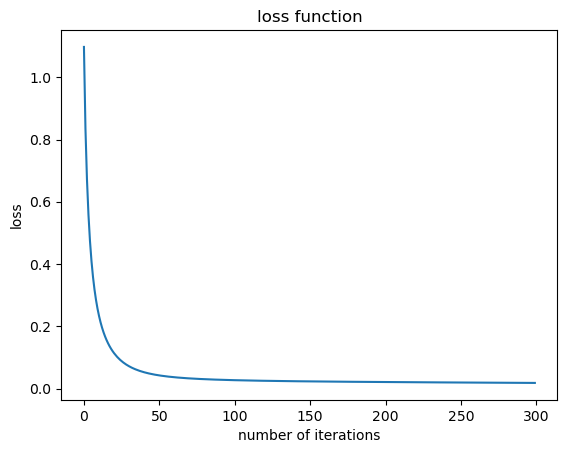

In [12]:
plt.plot(x, y)
plt.xlabel("number of iterations")
plt.ylabel("loss")
plt.title('loss function')
plt.show()